Import necessary packages

In [183]:
import math 
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold

The solution to penalized residual sum of squares (PRSS) is seen to be :
$$ β^{ridge}_{λ} = (Z^{⊤}Z + λI_{p})^{−1}Z^{⊤}Y $$

In [35]:
def weights_rr(Z,Y,L):
    """
    Find weights for concrete lamdba and data
        :Parameters:
      - `Z`: data set
      - `Y`: observed values
      - `L`: Lambda parameter
    """
    Z=pd.concat([pd.DataFrame(np.ones(len(Z))),pd.DataFrame(Z)],axis=1)
    Matrix_t=np.transpose(Z)
    W_i=np.dot(Matrix_t,Z)
    W_i_n=np.dot(np.linalg.inv(W_i+L),Matrix_t)
    W=np.dot(W_i_n,Y)
    return W

To find λ we have to calculate MSE(Mean Squared Error) through Cross Validation
$$ MSE={\frac  {1}{n}}\sum _{{i=1}}^{n}({\hat  {Y_{i}}}-Y_{i})^{2}$$

In [128]:
def mse(y,y_test,x_test):
    """
    Calculate mean squared error
        :Parameters:
      - `Z`: data set
      - `Y`: observed values
      - `L`: Lambda parameter

    :Returns:
      NxN weight matrix, there N is the size of the `training_inputs`.
    """
    n=len(x_test)
    x_test=pd.concat([pd.DataFrame(np.ones(n)),pd.DataFrame(x_test)],axis=1)
    w0=y[0]
    w1=y[1]
    y_mean=y_test
    x_mean_1=w0*x_test.iloc[:,0]+w1*x_test.iloc[:,1]
    msee=(x_mean_1-y_mean)**2
    return np.sum(msee)/n

K-Fold cross validation
$$ \begin{array}{rrl}
CV_{(K)} & = & \sum^K_{k=1} \frac{n_k}{n}\href{MSE}{MSE}_k \\
\text{where } MSE_k & = & \frac{ \displaystyle \sum_{i\in C_k}(y_i - \hat{y}_i)^2}{n_k}
\end{array} $$

In [221]:
def cv(kfolds,l_count,x,y):
    """
    Implementation cross validation mse 
            :Parameters:
      - `kfolds`: k in k-fold cross validation
      - `l_count`: max value for lambda
      - `x`: data set
      - `y`: observed values
    """
    mse_l=[]
    lambd_l=[]
    KF=KFold(len(x),n_folds=kfolds,random_state=1)
    XX_m=pd.DataFrame.as_matrix(pd.DataFrame(x))
    for lambd_i in np.linspace(0,l_count,2*l_count):
        for train_index, test_index in KF:
            X_train, X_test = XX_m[train_index, :], XX_m[test_index, :]
            y_train, y_test =y[train_index], y[test_index]
            W1=weights_rr(X_train,y_train,lambd_i)
            msee=mse(W1,y_test,X_test)
        mse_l.append(np.sum(msee)/kfolds)
        lambd_l.append(lambd_i)
    return lambd_l,mse_l

In [218]:
def new_data(n):
    """
    Generate new data  
    :Parameters:
      - `n`: Size of data set
    """
    n = n
    x = np.linspace(0, 2 * math.pi, n)
    y = x + 0.95 * np.random.randn(n)
    return x,y

So after all of it , go and find optimize value for λ

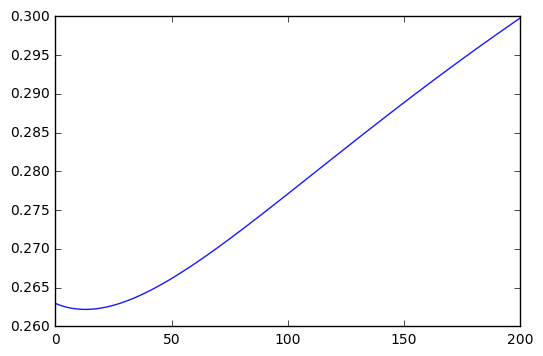

In [226]:
x,y = new_data(500)
lambda_list,mse_list= cv(3,200,x,y)
plt.plot(lambda_list, mse_list, alpha=0.9)
lambda_opt = lambda_list[mse_list.index(min(mse_list))] 

Now only we need to find weights with optimal λ

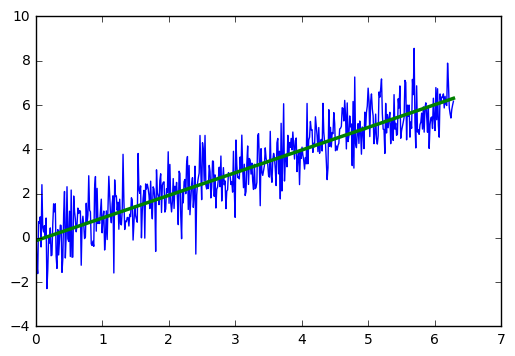

In [235]:
W=weights_rr(x,y,lambda_opt)
plt.plot(x, y)
plt.plot(x, x*W[1]+W[0], linewidth=2.5)